## Histograms
- A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image.
- To get a general understanding regarding the contrast, brightness and intensity distribution.
- ```cv2.calcHist()``` parameters:
    - image: provide this an a list. [my_image]
    - channels: This is a list of indexes, where we specify the index of the channel we want to compute a histogram for.
        - Grayscale = [0]
        - RGB = [0,1,2]
    - mask: If a mask is provided, a histogram will be computed for masked pixels only.Else, specify ```None```
    - histSize: List of number of bins we want to use when computing a histogram.
    - ranges: specify The range of possible pixel values. Normally, this is [0, 256]

In [1]:
import cv2
import numpy as np
import sys
sys.path.append('../')
from modules.utils import cv2_to_PIL
import matplotlib.pyplot as plt

### Grayscale histograms

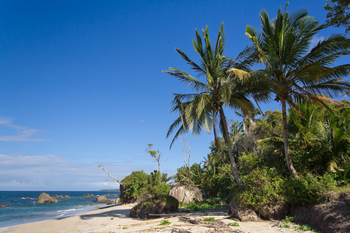

In [2]:
beach = cv2.imread('../data/beach.png')
cv2_to_PIL(beach)

In [3]:
beach_gray = cv2.cvtColor(beach,cv2.COLOR_BGR2GRAY)
cv2_to_PIL(beach_gray)

In [4]:
hist = cv2.calcHist([beach_gray],[0], None, [256], [0,256])

In [5]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

Interpretaions of Histogram:
- The majority of the pixels fall in the range of roughly 60 to 120.
- There is tail from 200 to 255 meaning, we have very few white pixels

### Color histograms

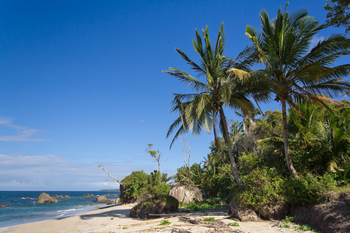

In [6]:
cv2_to_PIL(beach)

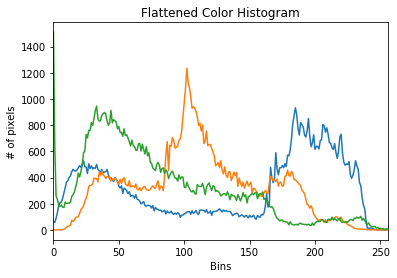

In [7]:
channels = cv2.split(beach)
colors = ("b", "g", "r")
plt.figure()
plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for (channel, color) in zip(channels,colors):
    hist = cv2.calcHist([channel],[0], None, [256], [0,256])
    plt.plot(hist)
    plt.xlim([0,256])

### Multi dimensional histograms

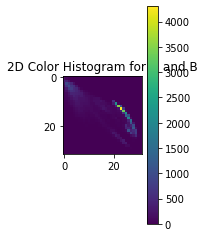

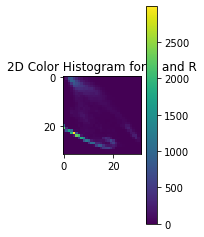

In [8]:
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([channels[1], channels[0]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

fig = plt.figure()
ax = fig.add_subplot(132)
hist = cv2.calcHist([channels[1], channels[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

fig = plt.figure()
ax = fig.add_subplot(133)
hist = cv2.calcHist([channels[0], channels[2]], [0, 1], None,[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

In [9]:
# Cnnsidering all the 3 channels
hist = cv2.calcHist([beach], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


#### Histogram Equalization
- improves the contrast of an image by “stretching” the distribution of pixels.
- Consider a histogram with a large peak at the center of it. Applying histogram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image.
- Histogram equalization is applied to grayscale images.<br>
Ex: In medical X-rays, satellite images

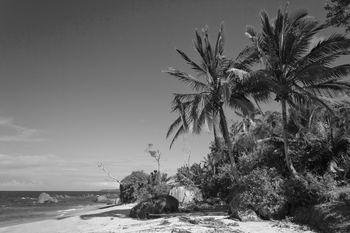

In [10]:
cv2_to_PIL(beach_gray)

In [11]:
eq_img = cv2.equalizeHist(beach_gray)
cv2.imshow("Histogram Equalization", np.hstack([beach_gray, eq_img]))
cv2.waitKey(0)

-1

### Mask

Construct a mask & compute histograms only for RoI

In [15]:
def plot_histogram(image, title, mask = None):
    # Grab the image channels, initialize the tuple of colors
    # and the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # Loop over the image channels
    for (chan, color) in zip(chans, colors):
        # Create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

In [16]:
plot_histogram(beach, "Histogram for Original Image")

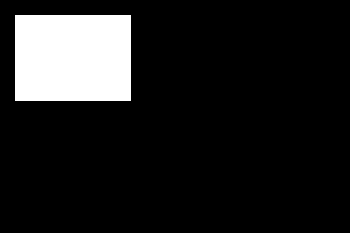

In [17]:
mask = np.zeros(beach.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
cv2_to_PIL(mask)

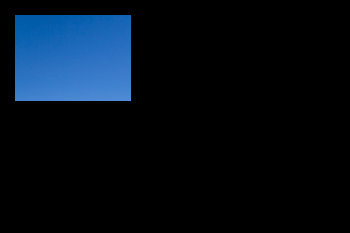

In [18]:
masked = cv2.bitwise_and(beach, beach, mask = mask)
cv2_to_PIL(masked)

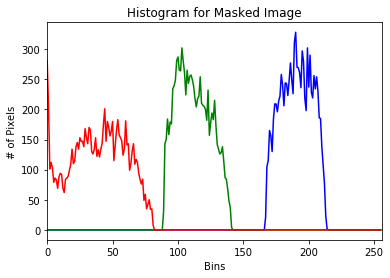

In [19]:
plot_histogram(beach, "Histogram for Masked Image", mask = mask)